<a href="https://colab.research.google.com/github/Priyanka-code-sys/DMML_1_New/blob/main/airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [256]:
# Importing data
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/csv/train.csv')
test = pd.read_csv('/content/drive/MyDrive/csv/test.csv')



In [257]:
# Get row and column count
train.shape

(103904, 25)

In [258]:
# Get a snapshot of data
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [259]:
# Drop unnecessary columns
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)

In [260]:
# Check size of the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Repeating the same steps for test data set as well...

In [261]:
test.shape

(25976, 25)

In [262]:
test.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,5,5,3,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,3,5,5,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,2,4,4,5,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,5,5,5,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,2,3,4,4,4,4,4,4,5,4,4,28,14.0,satisfied


In [263]:
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)

In [264]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [265]:
# Replace spaces in the column names with underscore
train.columns = [c.replace(' ', '_') for c in train.columns]

In [266]:
test.columns = [c.replace(' ', '_') for c in test.columns]

In [267]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [268]:
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

# Checking for Imbalance

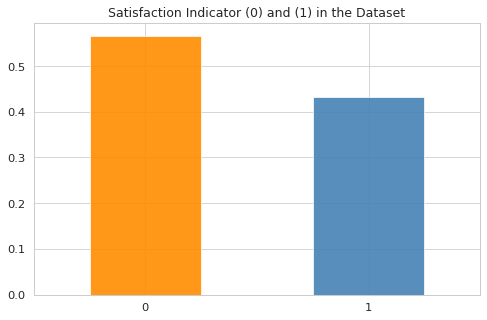

In [269]:
# Checking the nature of data set: balanced or imbalanced?
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

The above plot shows a distribution of around 55%:45% between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment/resampling.

# Handling of Missing Data

In [270]:
# Missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
satisfaction,0,0.000000
Food_and_drink,0,0.000000
Customer_Type,0,0.000000
Age,0,0.000000


In [271]:
# Imputing missing value with mean
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())

In [272]:
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [273]:
# Check the list of categorical variables
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [274]:
# Replace NaN with mode for categorical variables
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

In [275]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

# Exploratory Data Analysis

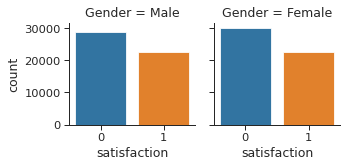

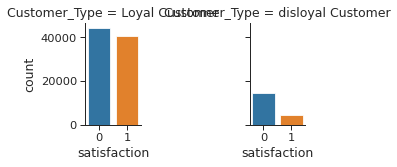

In [276]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)

**Gender:** 
It is observed that gender-wise distribution of dissatisfied and satisfied customers are quite same. For both male and female passengers, no. of dissatisfied customers are on the higher side compared to no. of satisfied customers.

**Customer Type:**
Loyal passengers are very high in number. Even among loyal passengers, the ratio of satisfied and dissatidfied ones are almost 49:51. 

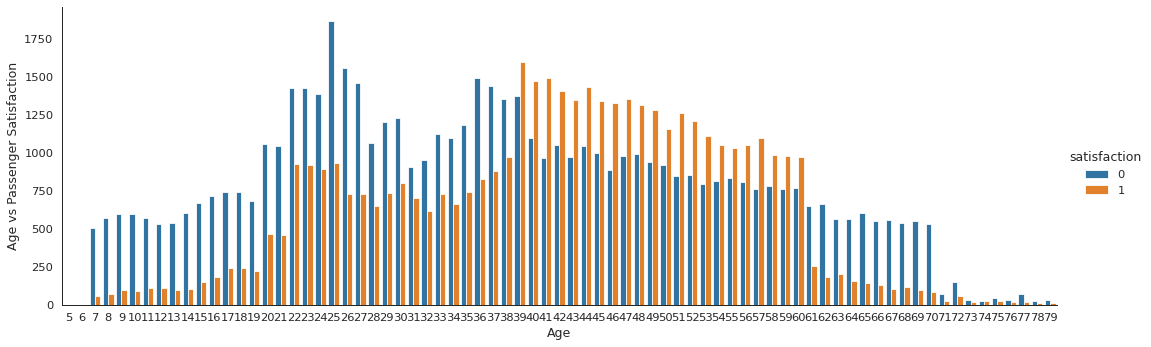

In [277]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

**Age:**
From age 7-to-38 and from age 61-to-79, quotient of dissatisfied passengers is very high compared to satisfied passengers. On the contrary, in age range 39-60, quotient of satisfied passengers is higher compared to dissatisfied passengers.

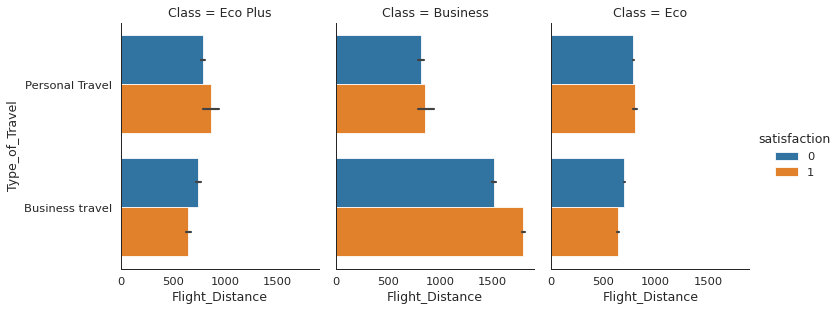

In [278]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

**Type of Travel, Class, Flight Distance:**
For business travel in business class category, the number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.


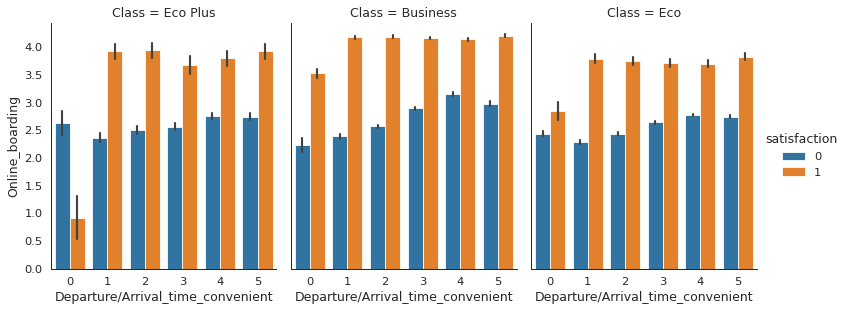

In [279]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

**Online Boarding, Departure/Arrival Time Convenience grouped by Class:**
For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers. 

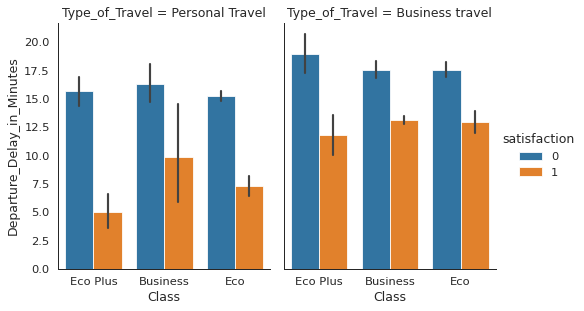

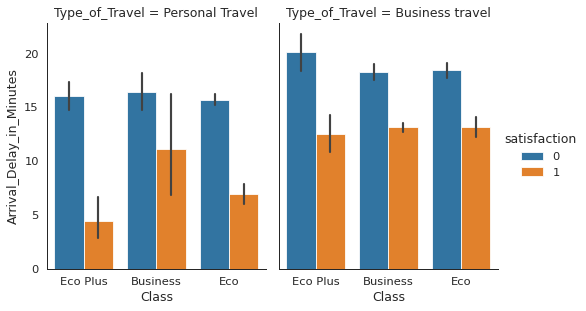

In [280]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=.8)

**Departure Delay, Arrival Delay grouped by Type of Travel:**
For personal travel (specially Eco Plus and Eco), the no. of dissatisfied passengers are really high when arrival delay in minutes is high. Now, this is quite obvious. By minute comparison, all combinations have higher no. of dissatisfied passengers compared to no. of satisfied passengers.

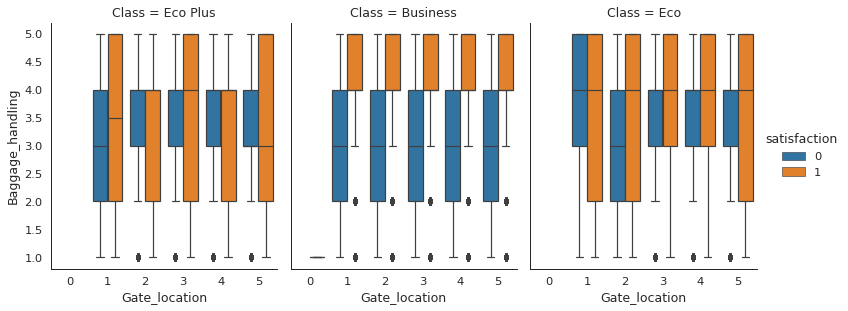

In [281]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

**Baggage Handling, Gate Location grouped by Class:**
For business class, it is observed that all gate locations have higher no. of dissatisfied passengers when baggage handling is not done perfectly well (rating <= 4). For Eco Plus, when the gate location is 1 and for Eco, when the gate location is 2, even when the baggages are handled in a mediocre way (rating in range 2.0 - 4.0), passengers remained dissatisfied.

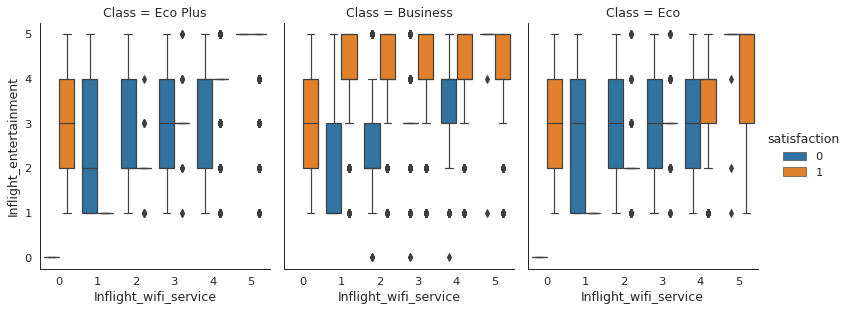

In [282]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

**Inflight Entertainment, Inflight wi-fi Service grouped by Class:**
It is interesting to find that Eco Plus passengers are mostly satisfied without in-flight wi-fi service (rating 0) and medium level of in-flight entertainment (rating 2 - 4). For Business class passengers, only highest level of in-flight entertainment (rating 5) can make them satisfied. For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

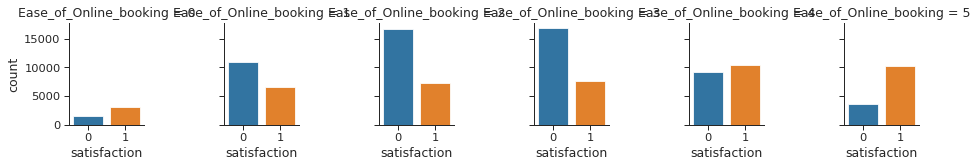

In [283]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)

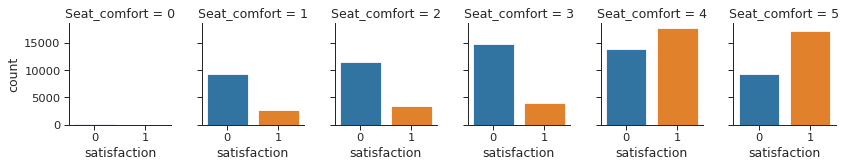

In [284]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

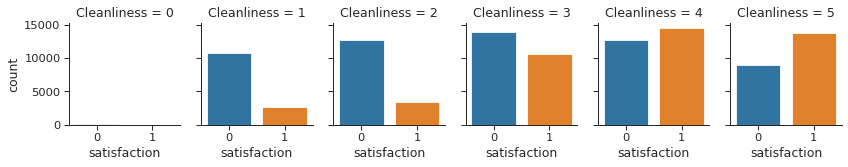

In [285]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

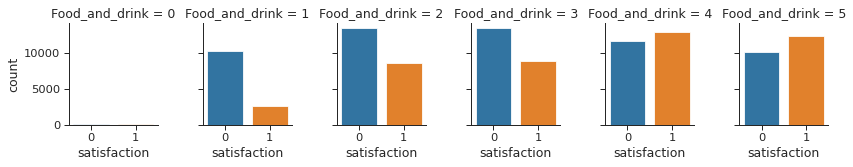

In [286]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

**Ease of Online Booking, Seat Comfort, Cleanliness, Food and Drink:**
For all of these features, maximum no. of satisfied passengers belong to the category of 4 and 5 rating givers. Below rating 4, passengers are mostly dissatisfied.

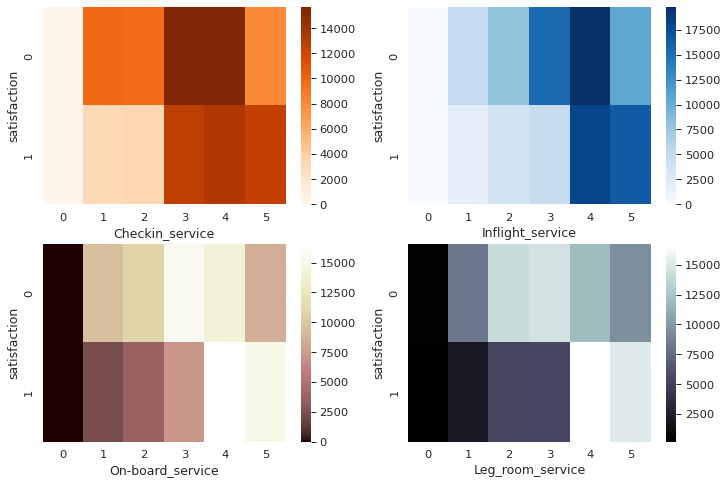

In [287]:
import matplotlib.pyplot as plt 
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

**Checkin Service, Inflight Service, On-board Service, Leg-room Service:**
For checkin service, 0-2 rating givers are predominantly dissatisfied. For other three services, only 4 and 5 rating givers belong to satisfied passengers category.  

# Label Encoding of Categorical Variables

In [288]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [289]:
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

# Outliers Detection and Removal

In [290]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [291]:
# Removing outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 23)

# Correlation among Features

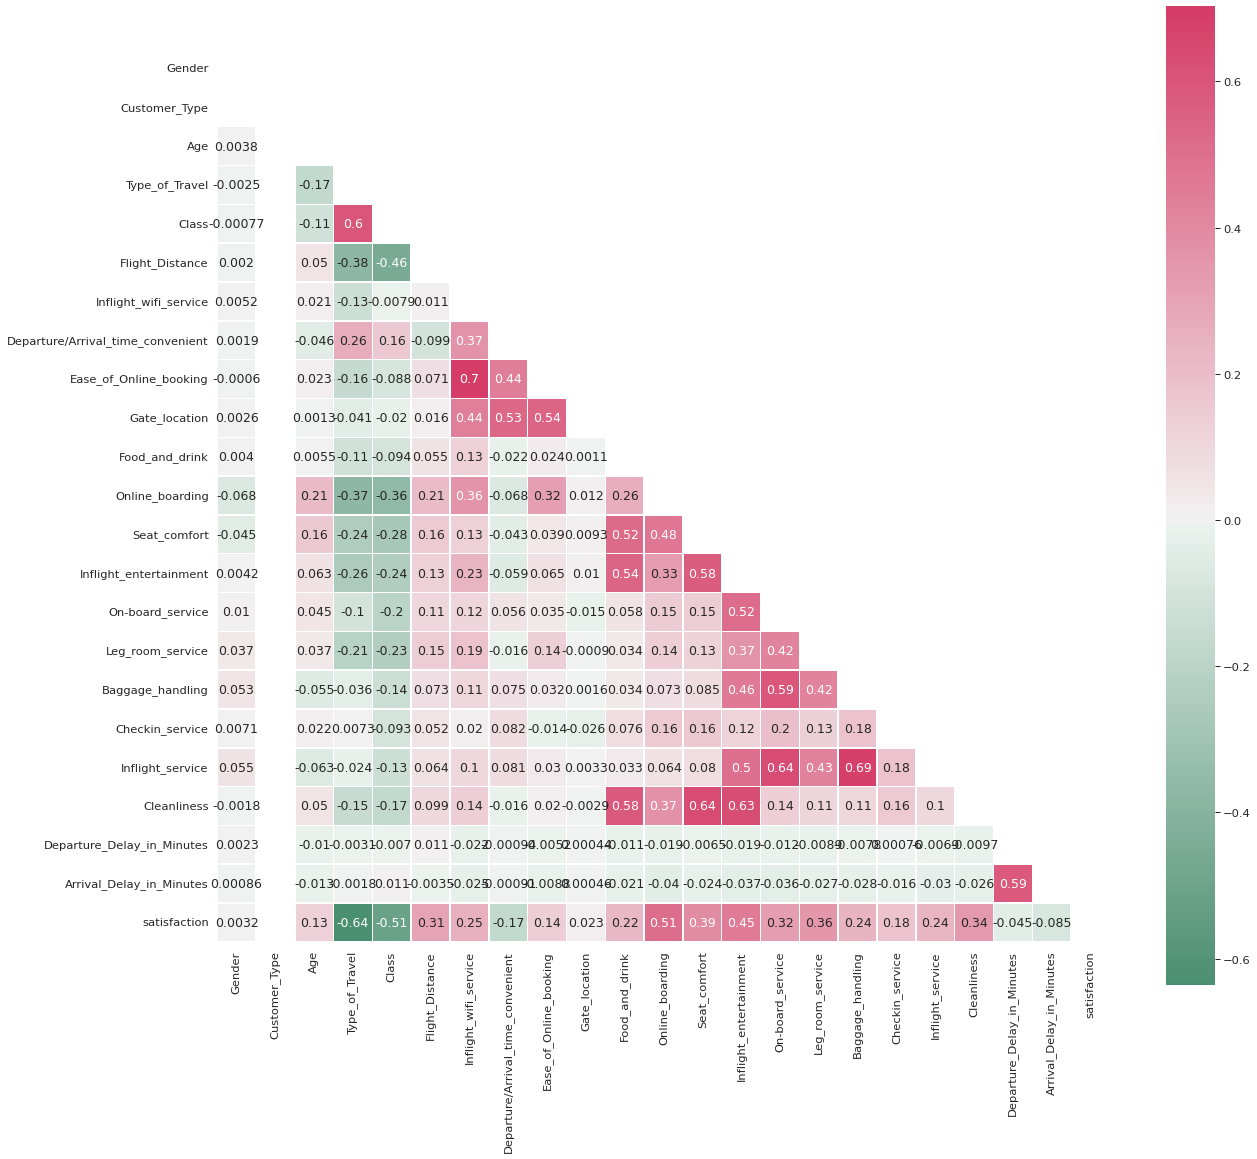

In [292]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service". Also "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corr. coefficient exactly equal to 1. So there is no perfect multicollinearity. Hence we are not discarding any variable. 

# Top 10 Feature Selection through Chi-Square

In [293]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,1.0,0.6,1.00,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,1.0,1.0,1.00,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,0.8,1.0,1.00,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,0.2,0.4,0.00,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,0.4,0.4,0.25,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [294]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Cleanliness'],
      dtype='object')


These are top 10 features impacting on passenger satisfaction. We will check feature importance with other methods as well.
# Feature Importance using Wrapper Method

In [295]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment']
[0.00412513 0.         0.0258749  0.21982853 0.08990315 0.03140161
 0.12224491 0.01737014 0.03081474 0.01485982 0.01068989 0.11324523
 0.06338185 0.06652081 0.02798984 0.04231821 0.02388634 0.02276466
 0.02411625 0.03309566 0.00702376 0.00854455]


So only these six features are inherently important in contributing towards passenger satisfaction. However, we will again cross-check with another feature importance deciding method.
# Feature Permutation Importance

In [296]:
import warnings
warnings.filterwarnings("ignore")

In [297]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [298]:
pip install eli5

In [299]:

import eli5 
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.2723 ± 0.0039,Type_of_Travel
0.1278 ± 0.0026,Inflight_wifi_service
0.0435 ± 0.0011,Online_boarding
0.0424 ± 0.0013,Seat_comfort
0.0355 ± 0.0009,Checkin_service
0.0294 ± 0.0014,Inflight_service
0.0289 ± 0.0008,Baggage_handling
0.0246 ± 0.0006,Cleanliness
0.0177 ± 0.0007,On-board_service
0.0172 ± 0.0007,Class


From all above results, finally we can combine and conclude the list of important features.

**Really Important Features:** Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort

**Important Features:** Class, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handling

# Building Models 

In [300]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [301]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

**Model-1: Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)**

Accuracy = 0.8132891900215584
ROC Area under Curve = 0.8201667535234151
Time taken = 0.5408139228820801
              precision    recall  f1-score   support

           0    0.88771   0.76381   0.82111     14573
           1    0.74384   0.87652   0.80475     11403

    accuracy                        0.81329     25976
   macro avg    0.81578   0.82017   0.81293     25976
weighted avg    0.82455   0.81329   0.81393     25976



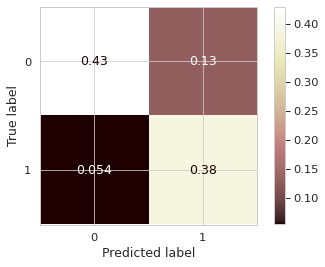

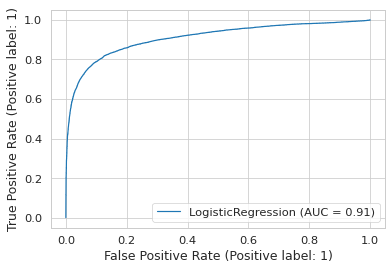

In [302]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Since Logistic Regression is a white-box model (explainable), we can dive deeper into it to get more insight. 

In [303]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.309527
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                61197
Model:                          Logit   Df Residuals:                    61185
Method:                           MLE   Df Model:                           11
Date:                Thu, 23 Dec 2021   Pseudo R-squ.:                  0.5533
Time:                        20:16:50   Log-Likelihood:                -18942.
converged:                       True   LL-Null:                       -42406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6437      0.016   -101.562      0.000      -1.675      -1.612
x2             0.2389      0.

We can see, among 12 features, except 6th feature (Inflight_entertainment), rest 11 features have p-value < 0.05. So these are really important features impacting highly towards the target variable. Also, a pseudo R-square value **(McFadden's Pseudo R-Squared Value)** of 0.55 represents an excellent fit. 

**Model-2: Naive Bayes Classifier**

Accuracy = 0.8334616569140745
ROC Area under Curve = 0.8345493488740687
Time taken = 0.050464630126953125
              precision    recall  f1-score   support

           0    0.87081   0.82564   0.84762     14573
           1    0.79102   0.84346   0.81640     11403

    accuracy                        0.83346     25976
   macro avg    0.83092   0.83455   0.83201     25976
weighted avg    0.83578   0.83346   0.83392     25976



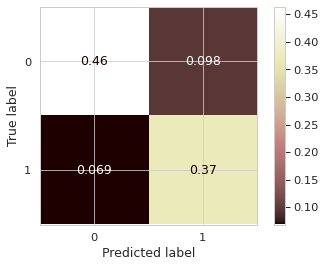

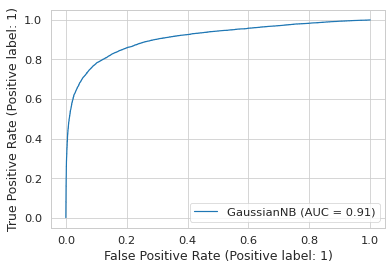

In [304]:
from sklearn.naive_bayes import GaussianNB

params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

**Model-3: K-Nearest Neighbor Classifier**

Accuracy = 0.8861256544502618
ROC Area under Curve = 0.8870270908506304
Time taken = 19.498788595199585
              precision    recall  f1-score   support

           0    0.91414   0.87964   0.89656     14573
           1    0.85326   0.89441   0.87335     11403

    accuracy                        0.88613     25976
   macro avg    0.88370   0.88703   0.88496     25976
weighted avg    0.88741   0.88613   0.88637     25976



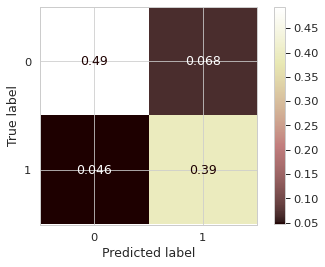

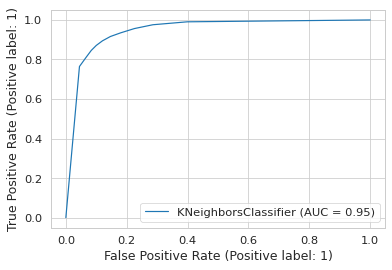

In [305]:
from sklearn.neighbors import KNeighborsClassifier

params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

Model-4: Decision Tree Classifier

Accuracy = 0.879927625500462
ROC Area under Curve = 0.884908273021195
Time taken = 0.11809349060058594
              precision    recall  f1-score   support

           0    0.93558   0.84410   0.88749     14573
           1    0.82289   0.92572   0.87128     11403

    accuracy                        0.87993     25976
   macro avg    0.87923   0.88491   0.87938     25976
weighted avg    0.88611   0.87993   0.88037     25976



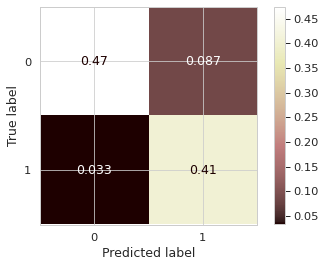

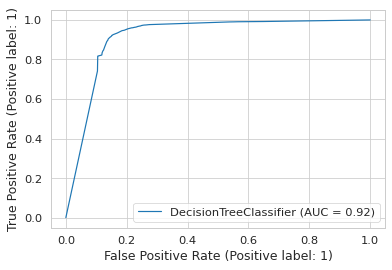

In [306]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Since Decision Tree is a white-box (explainable) model, we can deep-dive into its visualization to get more valuable insight below. From tree-visualization, we can extract rules which are contributing towards passenger-satisfaction.

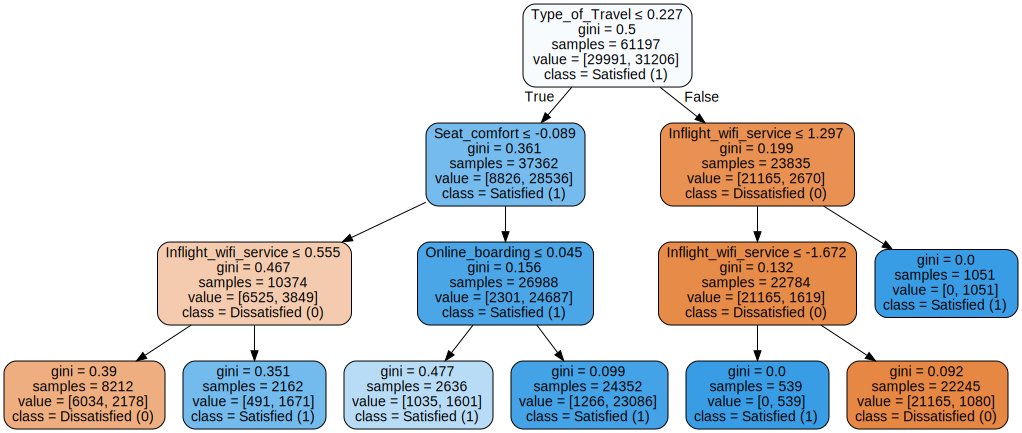

In [307]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

features_n = ['Type_of_Travel', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort']
X_train_n = scaler.fit_transform(train[features_n])
data = export_graphviz(DecisionTreeClassifier(max_depth=3).fit(X_train_n, y_train), out_file=None, 
                       feature_names = features_n,
                       class_names = ['Dissatisfied (0)', 'Satisfied (1)'], 
                       filled = True, rounded = True, special_characters = True)
# we have intentionally kept max_depth short here to accommodate the entire visual-tree, best result comes with max_depth = 12
# we have taken only really important features here to accommodate the entire tree picture
graph = graphviz.Source(data)
graph

From above tree visualization, it can be easily spotted that rule "Type_of_Travel <=0.227 and Seat_comfort <= -0.089 and Online_boarding <= 0.045" (all normalized values) contributes towards passenger satisfaction indicator= 1. Like that, many other rules can be extracted easily by going through the nodes.

**Model-5: Neural Network (Multilayer Perceptron)**

Accuracy = 0.878002771789344
ROC Area under Curve = 0.8848047080756629
Time taken = 44.10408973693848
              precision    recall  f1-score   support

           0    0.94687   0.82907   0.88406     14573
           1    0.81152   0.94054   0.87128     11403

    accuracy                        0.87800     25976
   macro avg    0.87919   0.88480   0.87767     25976
weighted avg    0.88745   0.87800   0.87845     25976



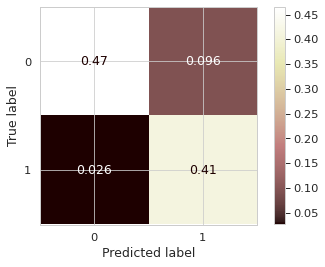

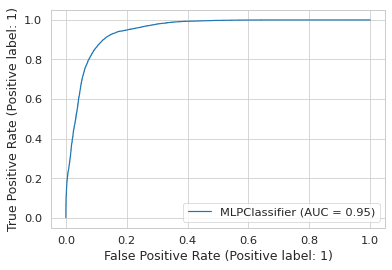

In [308]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

**Model-6: Random Forest**

Accuracy = 0.8941330458885125
ROC Area under Curve = 0.9003728693084586
Time taken = 5.096893548965454
              precision    recall  f1-score   support

           0    0.95723   0.84924   0.90001     14573
           1    0.83161   0.95150   0.88753     11403

    accuracy                        0.89413     25976
   macro avg    0.89442   0.90037   0.89377     25976
weighted avg    0.90208   0.89413   0.89453     25976



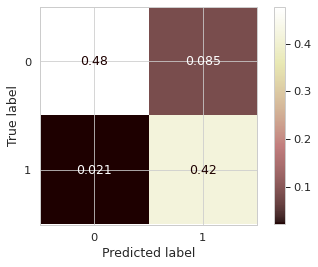

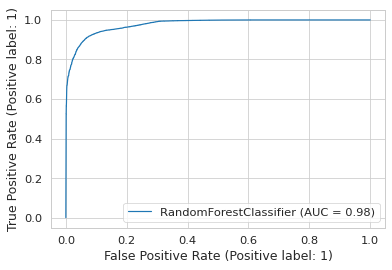

In [309]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Well, we see that Random Forest has performed very well on both Accuracy and area under ROC curve. So, we are now interested to see **how many decision trees are minimally required make the Accuarcy consistent** (recalling the fact that Random Forest is actually a bagged ensemble of decision trees).

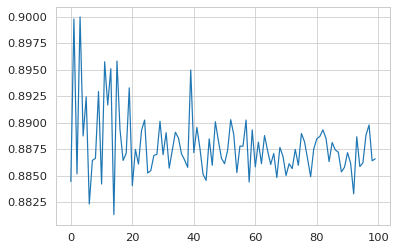

In [310]:
import numpy as np
%matplotlib inline

trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

From above graph, it is evident that **minimum 40 trees** are required to make accuracy fairly consistent (though minimal fluctuation is still there, and we can try the graph after increasing the no. of iterations).

**Model-7: Extreme Gradient Boosting**

Accuracy = 0.8910532799507237
ROC Area under Curve = 0.8979332859895301
Time taken = 82.65330100059509
              precision    recall  f1-score   support

           0    0.95925   0.84156   0.89656     14573
           1    0.82496   0.95431   0.88493     11403

    accuracy                        0.89105     25976
   macro avg    0.89210   0.89793   0.89074     25976
weighted avg    0.90030   0.89105   0.89145     25976



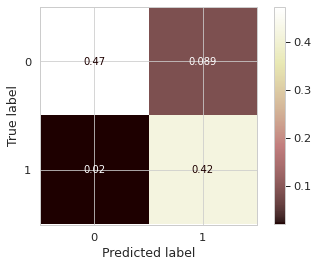

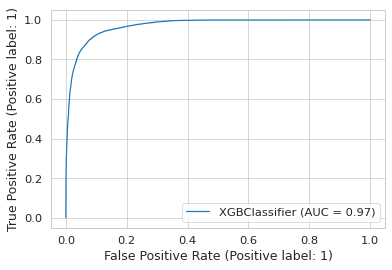

In [311]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

**Model-8: Adaptive Gradient Boosting**

Accuracy = 0.8955189405605174
ROC Area under Curve = 0.8996241085930146
Time taken = 23.071828365325928
              precision    recall  f1-score   support

           0    0.94313   0.86599   0.90291     14573
           1    0.84494   0.93326   0.88691     11403

    accuracy                        0.89552     25976
   macro avg    0.89403   0.89962   0.89491     25976
weighted avg    0.90002   0.89552   0.89589     25976



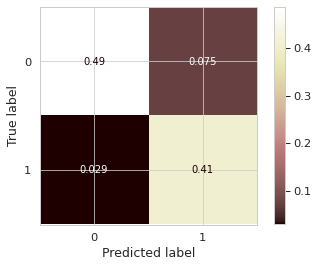

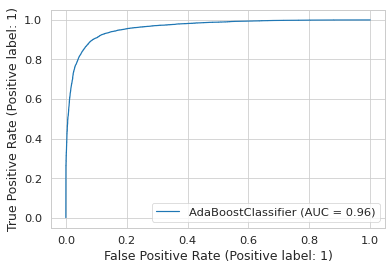

In [312]:
from sklearn.ensemble import AdaBoostClassifier as adab
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = adab(**params_adab)
model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

# Decision Region Plotting for Different Models

We will observe the boundary of decision regions plotted by all the models on training data. Also we will observe the number of misclassified data points in the plots.

In [313]:
import warnings
warnings.filterwarnings("ignore")

In [315]:
pip install six

In [317]:
pip install matplotlib-venn

In [321]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

ModuleNotFoundError: ignored

In [322]:
pip install mlrose

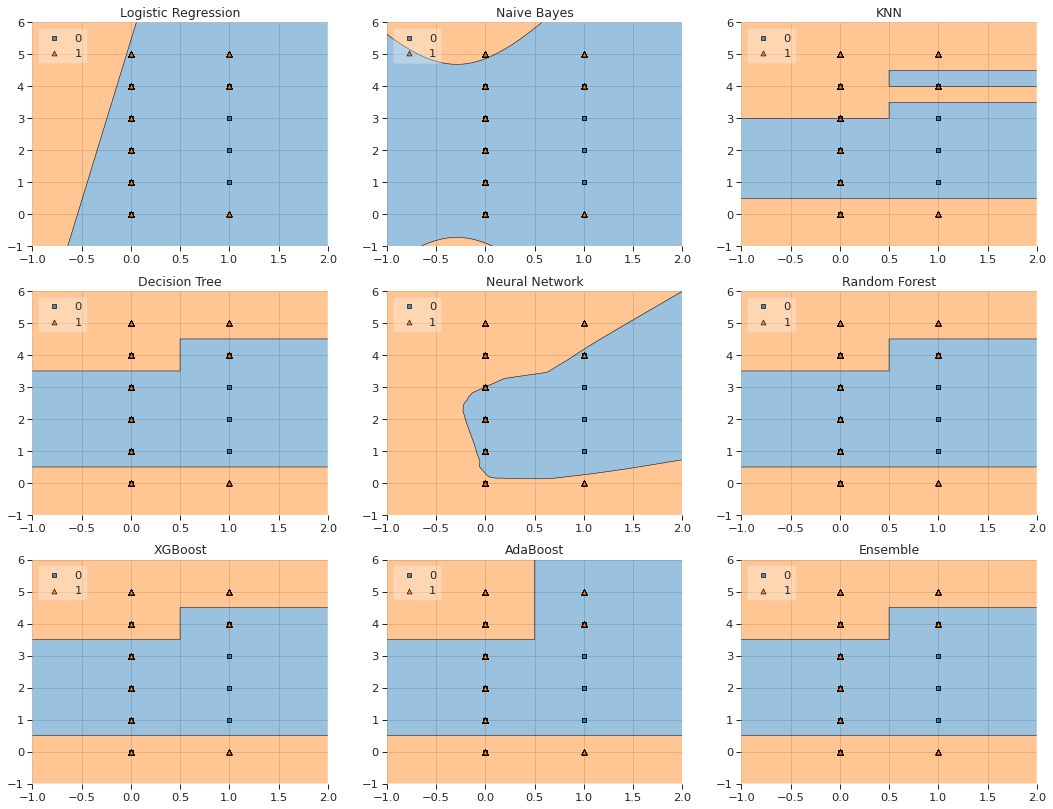

In [323]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.70
width = 0.85

clf1 = LogisticRegression(random_state=12345)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state=12345) 
clf5 = MLPClassifier(random_state=12345, verbose = 0)
clf6 = RandomForestClassifier(random_state=12345)
clf7 = xgb.XGBClassifier(random_state=12345)
clf8 = AdaBoostClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf6, clf7, clf8], weights=[1, 1, 1], voting='soft')

X_list = train[["Type_of_Travel", "Inflight_wifi_service", "Online_boarding", "Seat_comfort"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = train["satisfaction"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Naive Bayes',
          'KNN',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'XGBoost',
          'AdaBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value, 3: value}, 
                                filler_feature_ranges={2: width, 3: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

# Model Comparison:
We will compare the performace of various models by their respective ROC_AUC score and total time taken for execution.

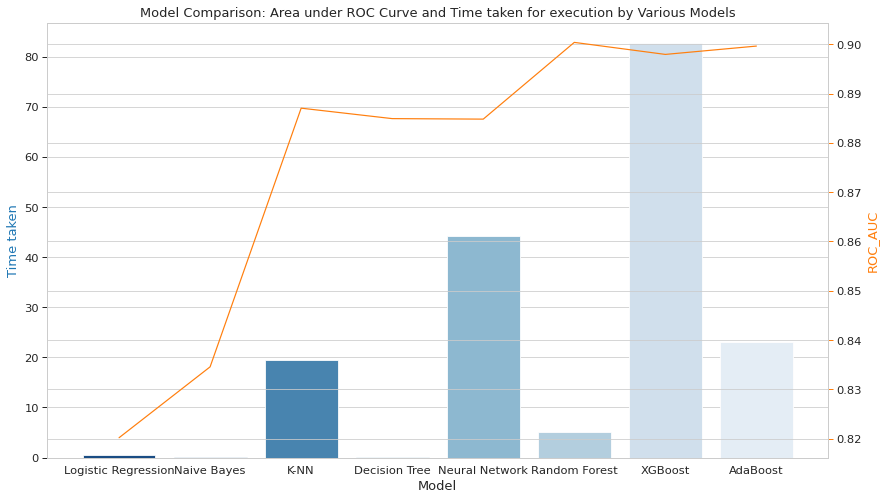

In [324]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_nn, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)